In [10]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [11]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [14]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [15]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [16]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [17]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


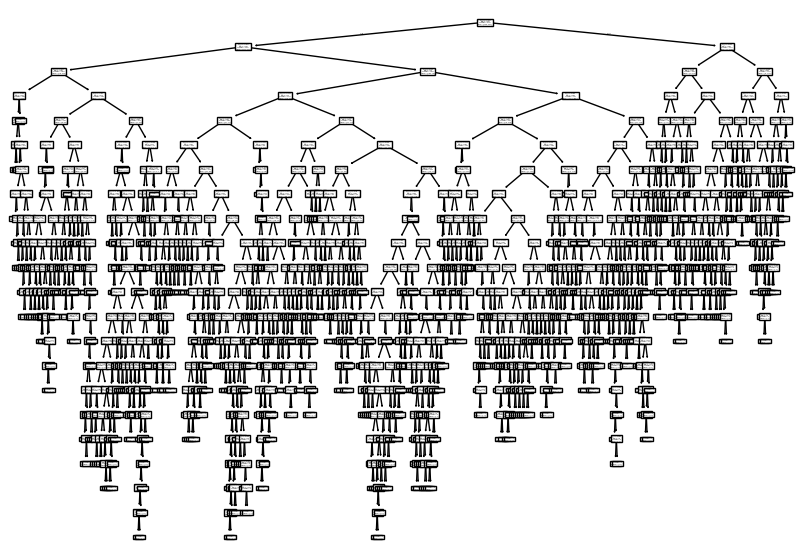

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

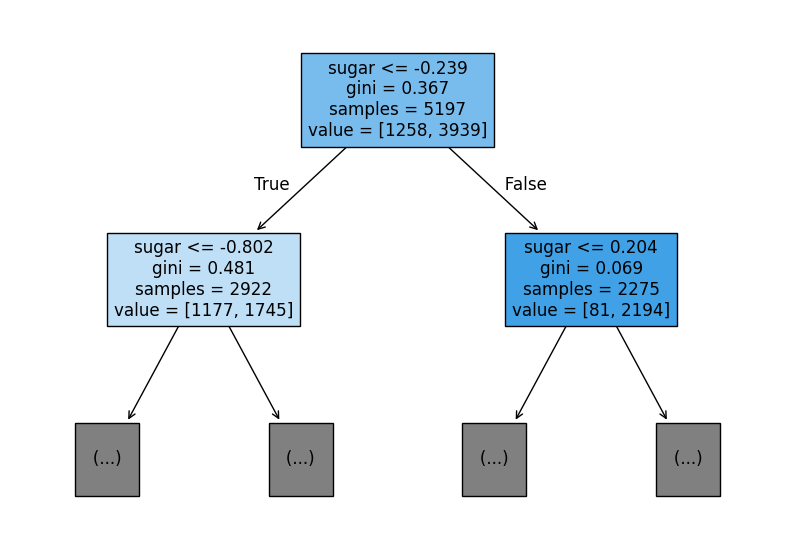

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


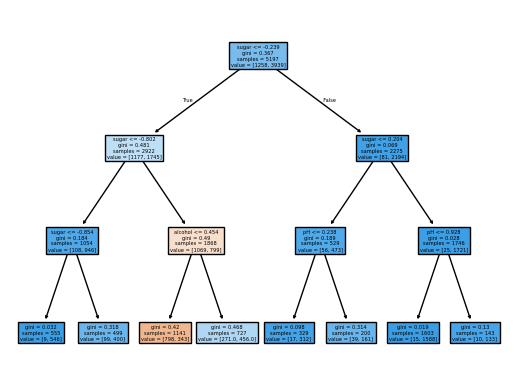

In [ ]:
plt.Figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


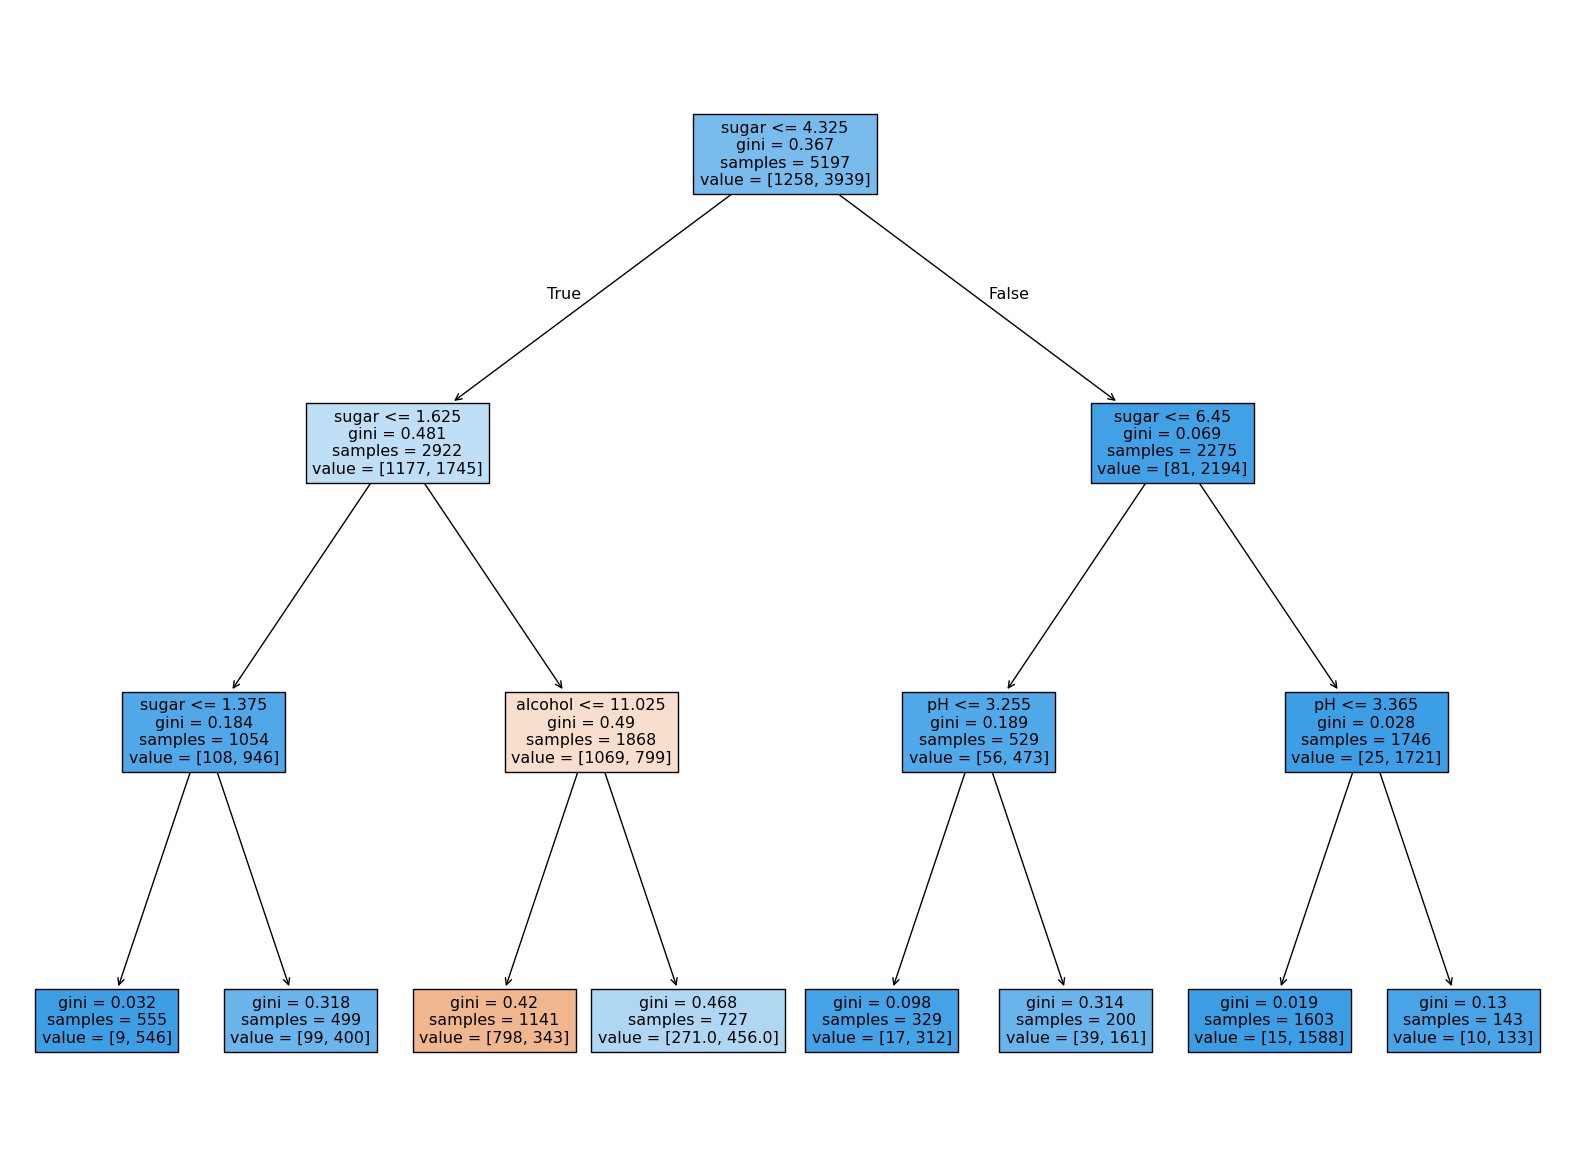

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
# Class를 타깃으로, 나머지 열은 특성으로

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
# 훈련 세트와 테스트 세트 분리

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# train_input과 train_target으로 sub_input, sub_target과 val_input, val_target 만들기

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
# sub, val set로 모델 만들고 평가

0.9971133028626413
0.864423076923077


In [ ]:
# 교차검증: 검증 세트를 뗴어 내어 평가하는 과정을 여러번 반복
# 3-폴드 교차 검증: 훈련 세트를 세 부분으로 나눠서 교차 검증을 수행 (보토은 5-,10-폴드를 많이 이용)
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

# cross_validate는 기본 5-폴드 교차검증 진행

{'fit_time': array([0.01701045, 0.01446629, 0.01045728, 0.00743222, 0.01205778]), 'score_time': array([0.00482512, 0.00291634, 0.00191951, 0.00168037, 0.00307345]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
#1. KFold
"""데이터를 균등한 크기로 K개로 나눔.
    클래스 비율을 고려하지 않음.
    데이터가 불균형하거나 클래스가 섞여 있지 않으면
    → 어떤 fold에는 특정 클래스가 거의 없거나 0개가 되는 문제가 생길 수 있음."""

#2. StratifiedKFold

"""각 fold마다 전체 데이터의 클래스 비율을 최대한 그대로 유지하도록 분할.
    특히 분류(Classification) 문제에서 매우 중요.
    예: 전체 데이터가 90% class A, 10% class B라면
    → 모든 fold에서 비슷한 비율(예: 90/10)을 유지함."""

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [ ]:
# 모델파라미터
"""머신러닝 모델이 학습하는 파라미터"""

# 하이퍼파라미터
"""모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터"""

# GridSearchCV
"""하이퍼파라미터 탐색과 교차 검증을 한 번에 수행 """

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# n_jobs=-1은 시스템에 있는 모든 코어를 사용하라는 의미

In [ ]:
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
# 그리드서치로 찾은 최적의 매개변수는 best_params_에 저장, 이 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련하고 best_estimator_에 저장

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])
# 각 매개변수에서 수행한 교차 검증의 평균 점수를 담고 있음

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
print(gs.cv_results_['params'][gs.best_index_])
#  best_index_ 속성을 사용해 가장 높은 값의 인덱스를 얻을 수 있음

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': range(5, 20), 'min_impurity_decrease': array([0.0001... 0.0009]), 'min_samples_split': range(2, 100, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [ ]:
from scipy.stats import uniform, randint
# 주어진 범위에서 고르게 값을 뽑는 클래스 (randint: 정숫값, uniform: 실숫값)

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

array([3, 7, 4, 4, 3, 6, 3, 5, 9, 6])

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 89,  92,  88, 103,  86, 117, 100, 103, 117, 105]))

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.48851812, 0.69539041, 0.10718806, 0.71717632, 0.6918538 ,
       0.73159473, 0.44259546, 0.77843265, 0.89404237, 0.89779246])

In [ ]:
#  min_samples_leaf: 리프 노드가 되기 위한 최소 샘플의 개수
# 어떤 노드가 분할하여 만들어질 자식 노드의 샘플 수가 이 값보다 작을 경우 분할하지 않음

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),}

# min_impurity_decrease: uniform(0.0001, 0.001) -> 0.0001에서 0.001 사이의 실숫값 샘플링
# max_depth: randint(20, 50) -> 20에서 50 사이의 정수 샘플링
# min_samples_split: 2에서 25 사이의 정수
# min_samples_leaf: 1에서 25 사이의 정수를 샘플링

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

#총 100번 샘플링하여 교차 검증을 수행하고 최적의 매개변수를 조합

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....x7d17b4e37b20>, 'min_impurity_decrease': <scipy.stats....x7d17b4ddcc40>, 'min_samples_leaf': <scipy.stats....x7d17b4e37670>, 'min_samples_split': <scipy.stats....x7d17b4dde410>}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
print(rs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.86


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [23]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [24]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [26]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42) 
# 결정 트리 개수를 500개로 늘림, learing_rate도 0.2로
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [29]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
# n_repeats dafault는 5
print(result.importances_mean)
# 출력 값은 순서대로 특성 중요도(importances), 평균(importances_mean), 표준 편차(importances_std)


[0.08876275 0.23438522 0.08027708]


In [32]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [33]:
hgb.score(test_input, test_target)

0.8723076923076923

In [35]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 34.3 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 39.8 MB/s  0:00:07m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9567059184812372 0.8783915747390243


In [37]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.5 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

[LightGBM] [Info] Number of positive: 3151, number of negative: 1007
[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757816 -> initscore=1.140744
[LightGBM] [Info] Start training from score 1.140744
[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Number of positive: 3151, number of negative: 1007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070635 seconds.
You can